# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Toh Kah Hie
#### Student ID: s3936897

Date: 22 September 2022

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used:
* pandas
* re
* random
* sklearn
* logging
* gensim
* matplotlib
* numpy
* nltk
* itertools

## Introduction

**Task 2** lets students generate 3 types of feature representation for Job Advertisement Descriptions namely Count vector representation, TF-IDF weighted vector representation as well as unweighted vector representation. 

The count vector representation is generated based on the vocabulary produced from Task 1. It is then saved into a text file named ```count_vectors.txt``` with the required formatting. The weighted and unweighted feature representation of the job advertisement descriptions on the other hand is generated based on an in-house trained FastText model.

**Task 3** asks students to build machine learning models for classifying the category of a job advertisement text and conduct experiments to determine:
* Which language model performs the best with the chosen machine learning model
* Whether including the title for each job advertisement for classification boosts the chosen model's accuracy

The chosen machine learning model in this task is a logistic regression model. The chosen model would be trained based on the 3 generated vector representations in Task 2 and evaluated using a 5-fold cross validation. The one that gave the best performance would then be used and experiment with different types of data including:
* Only the title of each job advertisement
* Only the description of each job advertisement (Task 2)
* A combination of both the title and description of each job advertisement

## Importing libraries 

In [1]:
# Task 2.1
import pandas as pd
import re
import random

# Task 2.2
from sklearn.feature_extraction.text import CountVectorizer

# Task 2.3
import logging
from gensim.models.fasttext import FastText
# 2.3.3
from sklearn.feature_extraction.text import TfidfVectorizer
# 2.3.4
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Task 3.1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Task 3.2
import nltk
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.probability import *
from nltk.util import ngrams

from itertools import chain

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

In this task, different types of feature representations will be generated, including:
* Count vector representation
* Weighted document embeddings
* Unweighted document embeddings

### Task 2.1 Loading the data as well as vocab
The dataset ```job_data.txt``` as well as the vocabulary ```vocab.txt``` generated previously in Task 1 are loaded for training the language model and generating feature representations.

The job_data.txt is loaded in the form of csv with columns including
* Title | Title of job advertisement | String
* Webindex | Webindex of job advertisement | Integer
* Company | Company of job advertisement | String
* Description | Description of job advertisement | String
* Filename | Which text file the job advertisement come from | String
* Target | Category of each job advertisement | String
* Processed_description | Pre-processed description | String

In [2]:
# Loaded saved dataset
job_df = pd.read_csv('job_data.txt')
job_df.head()

,Title,Webindex,Company,Description,Filename,Target,Processed_description
0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South ...,data\Accounting_Finance\Job_00382.txt,Accounting_Finance,accountant partqualified south east london man...
1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is cu...,data\Accounting_Finance\Job_00354.txt,Accounting_Finance,hedge funds london recruiting fund accountant ...
2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an ...,data\Healthcare_Nursing\Job_00547.txt,Healthcare_Nursing,exciting arisen establish provider elderly car...
3,Brokers Wanted Imediate Start,67996688,OneTwoTrade,OneTwoTrade is expanding their Sales Team and ...,data\Accounting_Finance\Job_00246.txt,Accounting_Finance,expanding recruiting junior trainee brokers ci...
4,RGN Nurses (Hospitals) Penarth,71803987,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and ...,data\Healthcare_Nursing\Job_00543.txt,Healthcare_Nursing,rgn nurses hospitals fulltime part swiis hour ...


In [3]:
# Validate the data types
print("Dataypes of each column:")
job_df.dtypes

Dataypes of each column:


Title                    object
Webindex                  int64
Company                  object
Description              object
Filename                 object
Target                   object
Processed_description    object
dtype: object

In [4]:
# Validate the dataset size
print('Number of rows and columns: ',job_df.shape)

Number of rows and columns:  (776, 7)


In [5]:
# Load saved vocabulary
# In the form of word:index
pattern = r'(.+):\d+'
with open('vocab.txt','r') as f:
    vocabulary = f.read().split()

vocab = [re.match(pattern, word).groups()[0] for word in vocabulary]


# Validate the vocabulary size
print("Number of words in vocab:",len(vocab))
print("Random sample of vocab:",random.sample(vocab,10))

Number of words in vocab: 5168
Random sample of vocab: ['machine', 'resilience', 'fmcg', 'timemanagement', 'solely', 'dependable', 'enrolment', 'reseller', 'discipline', 'opentable']


From above, it can be seen that all required data is loaded correctly, with the job advertisement dataset having 776 rows of data and the correct data types as well as the vocabulary having 5168 words.

### Task 2.2 Generate Bag-of-words model
In this task, the **Count** vector representation for each job advertisement description is generated

#### Task 2.2.1 Generate Count Vectors
The Count vector representation will be generated based on the loaded vocabulary.

In [6]:
# Function to generate the count vector representation
def generateCountVec(vocab,data):
    # Use vocab as its vocabulary
    countVectorizer = CountVectorizer(analyzer='word',vocabulary = set(vocab))
    count_features = countVectorizer.fit_transform(data)
    
    # Validate the vector representation by checking if the size is the same as vocab's
    print("Shape of document-by-word matrix:",count_features.shape)
    feature_names = countVectorizer.get_feature_names()
    print("Lenght of vocab is same as the length of feature names?:",vocab == feature_names)
    return count_features

In [7]:
count_features = generateCountVec(vocab,list(job_df['Processed_description'].values))

Shape of document-by-word matrix: (776, 5168)
Lenght of vocab is same as the length of feature names?: True


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
# Function to validate the count vector representation
vocab = sorted(list(vocab))
def validator(data_features, vocab, indx, df):
    # Get the webindex of the job ad
    print("Webindex:", df['Webindex'][indx])
    print("--------------------------------------------\n")
    # Get full description without cleaning
    print("Full Description:",df['Description'][indx],'\n')
    # Get cleaned description
    print("Tokens:",df['Processed_description'][indx])
    print("--------------------------------------------\n")
    # Print vector representation as 'word:count of word'
    print("Vector representation:\n") 
    for word, value in zip(vocab, data_features.toarray()[indx]): 
        if value > 0:
            print(word+":"+str(value), end =' ')

In [9]:
validator(count_features,vocab,random.randrange(0,job_df.shape[0]),job_df)

Webindex: 71080674
--------------------------------------------

Full Description: Eclypse Recruitment is currently looking for a NursingHome Manager for a beautiful nursing home located in Cheltenham in Gloucestershire. The home is part of an excellentorganisation where quality care and commitment to high standards are theirnumber **** priority. The nursing home weare recruiting for is a stunning building located centrally in Cheltenham andoffers a beautiful home for elderly frail nursing residents. The home we are recruiting for is split over **** floors andoffers general nursing care to over 65 years olds. The home produces a large profit each yearfor this excellent group which is why we are looking for someone truly exceptional to come on board and managing this nursing home. To apply for this post you must be able to meet thefollowing requirements: RGNQualified RegisteredManagers Award or NVQ Level 4 in Care Management Youmust have experience in managing nursing homes with a minim

From above, it can be confirmed that count vector representation is successfully and correctly generated.

### Task 2.3 Model based on word embeddings
In this task, a FastText language model will be used and trained on the pre-processed vocabulary to generate the word embeddings. The reason behind this is because according to  [O'Reilly](https://www.oreilly.com/library/view/deep-learning-essentials/9781785880360/12fe4a55-a5d0-4712-bd68-ac043b87a87e.xhtml), FastText takes into account the internal strucutre of words when learning word representation, which would work very better on syntactic tasks with corpus that has words with multiple morphological forms. GloVe model on the other hand focuses on words co-occurences on the whole corpus.

Considering that this is data about job advertisments, it is reasonable to say that the corpus would be morphologically rich. For example, "accountant", "account", "accounts" for a job that is related to Accounting and Finance.

In [10]:
# Use logging to see what is happening when training the model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#### Task 2.3.1 Training the FastText model
The pre-processed description of each job advertisement will be used as corpus to train the FastText language model

In [11]:
# Function train the FastText language model
def buildFTModel(corpus):
    # Initialize FastText model with vector size of 100 of the word embedding
    modelFT = FastText(vector_size=100)
    
    # Build vocab using the given corpus
    modelFT.build_vocab(corpus_iterable=corpus)
    
    # Train the laugage model based on the vocabulary
    modelFT.train(corpus_iterable=corpus,epochs=modelFT.epochs,total_examples = modelFT.corpus_count,total_words=modelFT.corpus_total_words)
    print(modelFT)
    return modelFT

In [12]:
# Use the pre-processed description saved in job_df as the corpus to train the FastText model
corpus =[desc.split(' ') for desc in job_df['Processed_description'].values]
modelFT = buildFTModel(corpus)

2022-09-29 22:19:40,103 : INFO : FastText lifecycle event {'params': 'FastText<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2022-09-29T22:19:40.102230', 'gensim': '4.2.0', 'python': '3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-09-29 22:19:40,104 : INFO : collecting all words and their counts
2022-09-29 22:19:40,104 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-09-29 22:19:40,118 : INFO : collected 5168 word types from a corpus of 81205 raw words and 776 sentences
2022-09-29 22:19:40,119 : INFO : Creating a fresh vocabulary
2022-09-29 22:19:40,131 : INFO : FastText lifecycle event {'msg': 'effective_min_count=5 retains 2741 unique words (53.04% of original 5168, drops 2427)', 'datetime': '2022-09-29T22:19:40.130214', 'gensim': '4.2.0', 'python': '3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0'

FastText<vocab=2741, vector_size=100, alpha=0.025>


From above, it can be seen that the model drops words that appears 5 times or less from the message ```'msg': 'effective_min_count=5 retains 2741 unique words (53.04% of original 5168, drops 2427)'```

In [13]:
# Extract the KeyedVectors object from the trained model
modelFT_wv = modelFT.wv
print(modelFT_wv)

FastTextKeyedVectors<vector_size=100, 2741 keys>


From above, it can be seen that the final size of vocabulary generated is 2741. Let's check out the model with some examples

In [14]:
# Get some words with different morphological forms
word_morphs = {'account':['accounts','accounting','accountant'],'engineer':['engineering','engineers']}


for word in word_morphs.keys():
    # For each word, check if the word exist in the vocabulary
    print(word,"does not exist") if word not in modelFT_wv.key_to_index else ""
    print("#####Checking on word:",word,"\t#####")
    for morph in word_morphs[word]:
        print(word,"does not exist") if word not in modelFT_wv.key_to_index else ""
        print("Similarity between",word,"and",morph,str(modelFT_wv.similarity(word, morph)))
        print()
    print("Most similar words with",word,":",modelFT_wv.most_similar(word, topn=10))
    print('-----------------------------------')

#####Checking on word: account 	#####
Similarity between account and accounts 0.9993176

Similarity between account and accounting 0.9985574

Similarity between account and accountant 0.999921

Most similar words with account : [('accountant', 0.9999210238456726), ('accountability', 0.9997172355651855), ('accountabilities', 0.9997133612632751), ('accordance', 0.9997032880783081), ('managed', 0.9996973872184753), ('components', 0.9996920824050903), ('abilities', 0.9996861815452576), ('risk', 0.9996724128723145), ('ets', 0.9996700286865234), ('rep', 0.9996647834777832)]
-----------------------------------
#####Checking on word: engineer 	#####
Similarity between engineer and engineering 0.9992981

Similarity between engineer and engineers 0.9996809

Most similar words with engineer : [('engineers', 0.9996808171272278), ('engineering', 0.999298095703125), ('mechanical', 0.9976637363433838), ('engines', 0.9971970915794373), ('electromechanical', 0.9970653057098389), ('electrical', 0.997019

From above, it can be seen that the model actually captures the similarity of these words! The 10 most similar words listed for each word are also indeed very similar!

#### Task 2.3.2 Generate unweighted document embeddings
In this task, the unweighted vector representation of job advertisement descriptions based on the trained model will be generated

As generating the vector representation requires each description to be a list of tokens rather than a string, a new column with the pre-processed descriptions split into list of tokens will be generated and added into job_df

In [15]:
# Transform string of tokens for each description into a list of tokens for each description
job_df['Tokens'] = [tokens.split(' ') for tokens in list(job_df['Processed_description'].values)]

In [16]:
# Check out some of the data
job_df[['Webindex','Processed_description','Target','Tokens']].sample(n=5)

,Webindex,Processed_description,Target,Tokens
138,71432102,qualified accountant european financial contro...,Accounting_Finance,"[qualified, accountant, european, financial, c..."
409,68179675,overview carillion companies substantial portf...,Engineering,"[overview, carillion, companies, substantial, ..."
271,67753890,progressive global energy operations engineer ...,Engineering,"[progressive, global, energy, operations, engi..."
689,67959409,deputy rgn rmn swansea time permanent compass ...,Healthcare_Nursing,"[deputy, rgn, rmn, swansea, time, permanent, c..."
671,68806418,circa bonus car allowance pension home england...,Sales,"[circa, bonus, car, allowance, pension, home, ..."


In [17]:
# Function to generate document vectors based on the pre-trained word embedding model
def gen_docVecs(wordVec,desc_tokens):
    # Create empty dataframe to store all document embeddings of job ad descriptions
    docVecs = pd.DataFrame()
    
    # For each document
    for indx in range(len(desc_tokens)):
        # Load tokens of each document
        tokens = desc_tokens[indx]
        # Create a temporary dataframe
        temp = pd.DataFrame()
        # For each token ib the doc
        for tok_indx in range(len(tokens)):
            try:
                token = tokens[tok_indx]
                # Get the word embedding if it is preset
                word_vec = wordVec[token]
                # Append to temporary dataframe
                temp = temp.append(pd.Series(word_vec),ignore_index=True)
            except:
                pass
        # Take the sum of each column
        doc_vec = temp.sum()
        # Append the value into the dataframe
        docVecs = docVecs.append(doc_vec,ignore_index=True)
    return docVecs

In [18]:
# Get the unweighted document embeddings
ftext_dv = gen_docVecs(modelFT_wv,job_df['Tokens'])

Now that the unweighted document embeddings is generated, it has to be checked so that it contains no null values

In [19]:
ftext_dv.isna().any().sum()

0

From above, it can be seen that the unweighted vector representation is successfully generated.

#### Task 2.3.3 Generate TF-IDF weighted document vectors
In this task, the weighted document vectors will be generated based on the TF-IDF vectors of the data. As generating this data requires the tf-idf weights of the words, it would be generated as well

In [20]:
# Dictionary of vocab is generated in the form of index:word for generating the document vectors
vocDict = {indx:vocab[indx] for indx in range(len(vocab))}
vocDict

{0: 'aap',
 1: 'aaron',
 2: 'aat',
 3: 'abb',
 4: 'abenefit',
 5: 'aberdeen',
 6: 'abi',
 7: 'abilities',
 8: 'abreast',
 9: 'abroad',
 10: 'absence',
 11: 'absolute',
 12: 'ac',
 13: 'aca',
 14: 'academic',
 15: 'academy',
 16: 'acca',
 17: 'accept',
 18: 'acceptable',
 19: 'acceptance',
 20: 'accepted',
 21: 'access',
 22: 'accessible',
 23: 'accident',
 24: 'accommodates',
 25: 'accommodation',
 26: 'accomplished',
 27: 'accordance',
 28: 'account',
 29: 'accountabilities',
 30: 'accountability',
 31: 'accountable',
 32: 'accountancy',
 33: 'accountant',
 34: 'accountants',
 35: 'accounting',
 36: 'accounts',
 37: 'accreditation',
 38: 'accredited',
 39: 'accruals',
 40: 'accuracy',
 41: 'accurate',
 42: 'accurately',
 43: 'achievable',
 44: 'achieve',
 45: 'achieved',
 46: 'achievement',
 47: 'achievements',
 48: 'achiever',
 49: 'achieving',
 50: 'acii',
 51: 'acquired',
 52: 'acquisition',
 53: 'acquisitions',
 54: 'act',
 55: 'acting',
 56: 'action',
 57: 'actions',
 58: 'action

In [21]:
# Function that maps between the word_index and the actual word to create a dictionary of word:weight
def doc_word_weights(data_features,voc_dict):
    # List to store word:weight
    tfidf_weights = []
    
    # For each document
    for desc_indx in range(0,data_features.shape[0]):
        # Append each document into the list as a dictionary of word and its weight
        # voc_dict[wrd_indx] gets the actual word from index
        # data_features[desc_indx][0,wrd_indx] gets the tfidf word weights for a specific word in a specific document
        # We only get words that appeared in the document
        tfidf_weights.append({voc_dict[wrd_indx]:data_features[desc_indx][0,wrd_indx] for wrd_indx in data_features[desc_indx].nonzero()[1]})
    return tfidf_weights

In [22]:
# Function to generate the tfidf weights of word based on the vocab previously generated
def generateTfidfVec(vocab,data):
    tf_vec = TfidfVectorizer(analyzer='word',vocabulary=vocab)
    tfidf_features = tf_vec.fit_transform(data)
    print("Shape of tfidf-features:",tfidf_features.shape)
    return tfidf_features

In [23]:
tfidf_features = generateTfidfVec(vocab,list(job_df['Processed_description'].values))

Shape of tfidf-features: (776, 5168)


From above, the tf-idf weights of words are successfully generated and is validated that the size of the feature names is the same as the our vocab, which is 5168 words. Let's check out some of them!

In [24]:
validator(tfidf_features,vocab,random.randint(0,tfidf_features.shape[0]),job_df)

Webindex: 68510409
--------------------------------------------

Full Description: Retentions Advisor Hours  Full time working until 7pm one evening per week to be arranged Salary ****  **** per annum dependant on experience  commission Central Leeds, West Yorkshire This role focuses on the daytoday work associated with processing customer complaints, cancellations and ensuring payments from clients are up to date and are distributed to creditors within the agreed time frame as set by the TSI and ensuring that the quality of the customer experience is in line with agreed service standards and meets internal procedures and controls. Candidate's main priority will be dealing with escalated issues from clients by communicating with them verbally and in writing regarding their complaint/cancellation. You will be expected to liaise and maintain relationships with external agencies such as FOS and Citizens Advice. Essentials skills Minimum 12 months experience dealing with complaint Handling

TF-IDF vectors successfully generated! Let's move on to map the tf-idf weights to the words 

In [25]:
tfidf_weights = doc_word_weights(tfidf_features,vocDict)

Now that the tf-idf weights are successfully mapped, let's check out some of the documents

In [26]:
doc_num = random.randint(0,tfidf_features.shape[0])
print("TF-IDF weights of each word for document with index",doc_num)
tfidf_weights[doc_num]

TF-IDF weights of each word for document with index 584


{'winchester': 0.35545375398642004,
 'time': 0.07028653973201449,
 'tight': 0.1307170134643235,
 'technical': 0.1602950017965001,
 'subject': 0.10787797850357156,
 'specialising': 0.1281380130609587,
 'southampton': 0.154737446688868,
 'sound': 0.12256138327298954,
 'solutions': 0.08509032453700019,
 'skilled': 0.12466230395242023,
 'senior': 0.079475150275685,
 'sectors': 0.10612384448206837,
 'sector': 0.08822763316006656,
 'relevant': 0.07969750008828187,
 'ref': 0.12256138327298954,
 'recruiter': 0.16623216184103903,
 'rapidly': 0.1281380130609587,
 'qualified': 0.07734260722177769,
 'projects': 0.1758552722391075,
 'progress': 0.10291103792948451,
 'professionals': 0.1179034811860806,
 'portsmouth': 0.16623216184103903,
 'placing': 0.158076531649705,
 'ote': 0.09868596036860193,
 'number': 0.09500966465122172,
 'meet': 0.09351724345674423,
 'location': 0.16453174553353825,
 'level': 0.14387045683756924,
 'keen': 0.1179034811860806,
 'junior': 0.11967589928159962,
 'intermediate': 

Now that is done, we could go on and generate the tf-idf weighted document embeddings now

In [27]:
# Function to generate the tf-idf weighted document embeddings
def gen_docVecs_weighted(wordVec,desc_tokens,tfidf=[]):
    # Empty final dataframe
    docVecs = pd.DataFrame()
    
    # For each document
    for indx in range(len(desc_tokens)):
        # Get tokens for each document
        tokens = list(set(desc_tokens[indx]))
        # Get a temporary dataframe
        temp = pd.DataFrame()
        
        # For each token within the document
        for tok_indx in range(len(tokens)):
            try:
                token = tokens[tok_indx]
                # Get word embedding if present
                word_vec = wordVec[token]
                
                # Get tf-idf wieght of word if present
                weight = float(tfidf[indx][token]) if tfidf != [] else 1
                # Append to temporary dataframe
                temp = temp.append(pd.Series(word_vec*weight),ignore_index=True)
            except:
                pass
        # Take the sum of each column
        doc_vec = temp.sum()
        
        # Append document value to the dataframe
        docVecs = docVecs.append(doc_vec,ignore_index=True)
    return docVecs

In [28]:
weighted_ftext_dv = gen_docVecs_weighted(modelFT_wv,job_df['Tokens'],tfidf_weights)

Now that the weighted document embeddings is generated, it has to be checked so that it contains no null values as well

In [29]:
weighted_ftext_dv.isna().any().sum()

0

TF-IDF weighted document embeddings successfully generated! Let's check out the difference between these document embeddings!

#### Task 2.3.4 Plot TSNE
This task plots the embedding vectors in a 2 dimensional space using TSNE to represent the feature space

In [30]:
def plotTSNE(labels,docVecs,ax,weighted):
    # Get the targets of job advertisements
    targets = sorted(labels.unique())
    # Get 30% of the data for representation
    size = int(len(docVecs)*0.3)
    
    # Randomly get the data from the dataset
    indices = np.random.choice(range(len(features)),size=size,replace=False)
    projected_features = TSNE(n_components=2,random_state=0).fit_transform(docVecs[indices])
    # Plot the points
    for target in targets:
        points = projected_features[(labels[indices]==target)]
        ax.scatter(points[:,0],points[:,1],label=target)
        if weighted:
            ax.set_title("Weighted Feature vector",fontdict=dict(fontsize=15))
        else:
            ax.set_title("Unweighted Feature vector",fontdict=dict(fontsize=15))
    ax.legend()        

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


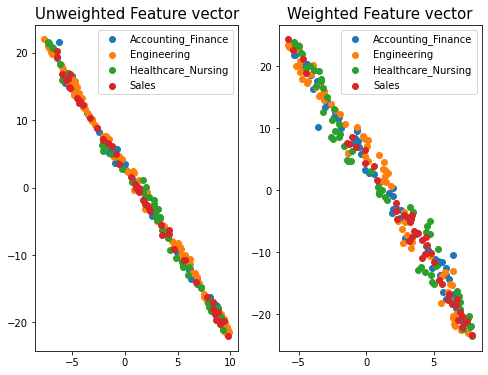

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6))
# Plot unweighted document embeddings
features = ftext_dv.to_numpy()
plotTSNE(job_df['Target'],features,ax1,False)

# Plot tf-idf weighted document embeddings
features = weighted_ftext_dv.to_numpy()
plotTSNE(job_df['Target'],features,ax2,True)

From there, all feature representations are successfully generated! It is time to save the count vector representation into a text file

### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [32]:
# Save the count vector representation of job advertisement descriptions
with open('count_vectors.txt','w') as f:
    # For each document
    for desc_indx in range(count_features.shape[0]):
        # Get the webindex of the job
        count = '#' + str(job_df['Webindex'][desc_indx])
        # For each word that appears
        for ftr_indx in count_features[desc_indx].nonzero()[1]:
            count += ','
            value = count_features[desc_indx][0,ftr_indx]
            count += "{}:{}".format(ftr_indx,value)
        f.write(count+'\n')
    f.close()

## Task 3. Job Advertisement Classification

In this task, Logistic Regression model is used to classify the category of a job advertisement from the 3 different vector representations generated in Task 2. A 5-fold cross validation is used to get the performance of each model. The vector representation that provides the best model performance would then be used for different experimentation to determine whether more information equals higher accuracy.

#### Task 3.1 Q1: Language Model Comparison
The model used in this project would be the logistic regression model. The labels for each job advertisement used would be the labels stored in job_df.

In [33]:
# Function for generating classification model evaluate model
# Set the seed to be 0 to have the same train test split across all classification
seed = 0
def classification(features):
    # Perform train and test split for the data given and set the category as job_df['Target']
    X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(features, job_df['Target'], list(range(0,len(job_df))),test_size=0.33, random_state=seed)
    
    # Initialize the model
    model = LogisticRegression(max_iter=3000,random_state=seed)
    # Fit the data
    model.fit(X_train, y_train)
    # Get the score
    model.score(X_test, y_test)
    
    # Perform 5-fold Cross validation
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(model,X_test,y_test,cv=cv)
    # Get accuracy as well as the standard deviation
    print('Accuracy: Mean: %.3f STD: (%.3f)' % (mean(scores), std(scores)))

#### Task 3.1.1 Model performance using unweighted document embeddings

In [34]:
classification(ftext_dv)

Accuracy: Mean: 0.759 STD: (0.064)


#### Task 3.1.2 Model performance using weighted document embeddings

In [35]:
classification(weighted_ftext_dv)

Accuracy: Mean: 0.622 STD: (0.049)


#### Task 3.1.3 Model performance using Count vector representation

In [36]:
# Classification using count vectors
classification(count_features)

Accuracy: Mean: 0.852 STD: (0.020)


It seems like among all models, classifying jobs using count vectors returned the best results!

#### Task 3.2 Q2: Does more information provide higher accuracy?
Since that in the previous question, using count vectors provided the best results, count vectors would be used for subsequent experiments with titles as well

#### Task 3.2.1 Classification using only the titles
Since the titles has not been pre-processed, pre-processing steps done on the job descriptions would be applied to titles as well. Pre-processing function would be copied from Task 1 and used.

In [37]:
# Step 5. Remove stopwords from stopwords_en.txt
with open('stopwords_en.txt','r') as f:
    stopwords = f.read().split()
print("Number of stopwords:",len(stopwords))
print("First 10 stopwords:",random.sample(stopwords,10))

Number of stopwords: 571
First 10 stopwords: ['besides', 'see', "i've", 'alone', 'hereafter', 'upon', 'go', 'instead', 'hers', 'first']


In [38]:
# Tokenization based on set pattern
pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
def tokenizeDesc(raw_desc):
    # Step 3. Convert to lower case
    desc = raw_desc.lower()

    # Sentence Segmentation
    # Transform 'Hello World. Bye World.'
    #             to
    # ['Hello World., Bye World.']
    sentences = sent_tokenize(desc)
    
    # Step 2. Tokenize each sentence into tokens
    # Transform ['Hello World., Bye World.']
    #                to
    # [['Hello','World'],['Bye','World']]
    tokenizer = RegexpTokenizer(pattern)
    list_tokens = [tokenizer.tokenize(sentence) for sentence in sentences]
    
    # Flatten the list of lists into a single list
    # Transform [['Hello','World'],['Bye','World']]
    #                to
    # ['Hello','World','Bye','World']
    tokenised_desc = list(chain.from_iterable(list_tokens))
#     print(tokenised_desc)
    return tokenised_desc

# Step 9. Build vocabulary
def generateVocab(descriptions):
    # Get all tokens of all descriptions as a list of tokens
    all_tokens = list(chain.from_iterable(descriptions))
    # Generate a unigram from the tokens
    unigrams = ngrams(all_tokens,n=1)
    freq_unigram = FreqDist(unigrams)

    # print(freq_unigram.items())
    sorted_keys = sorted(freq_unigram.keys())
    keys = [key[0] for key in sorted_keys]
    print(keys[:10])
    print("Number of tokens:",len(keys))
    
    return keys

In [39]:
# 1.1 Extract titlle
titles = job_df['Title'].copy()

# 1.2 & 1.3 Tokenization & Lower case
titles = [tokenizeDesc(title) for title in titles]

# 1.4 Remove words of length less than 2 
titles = [[token for token in title if len(token)>=2] for title in titles]

# 1.5 Remove words appear in stopwords
titles = [[token for token in title if token not in stopwords] for title in titles]

# 1.6 Remove words appearing only once
all_tokens = list(chain.from_iterable(titles))
term_freq = FreqDist(all_tokens)
words_appear_once = set(term_freq.hapaxes())
titles = [[token for token in title if token not in words_appear_once] for title in titles]

# 1.7 Removing 50 most common words
unique_tokens = list(chain.from_iterable([set(title) for title in titles]))
doc_freq = FreqDist(unique_tokens)
doc_freq_words = [item[0] for item in doc_freq.most_common(50)]
titles = [[token for token in title if token not in doc_freq_words] for title in titles]

# Flatten the list of lists into a single list
titles = [" ".join(token) for token in titles]

Now that all titles are pre-processed, let's check out some of them

In [40]:
random.sample(titles,10)

['construction products surrey',
 'fitter',
 'mortgage services uk leading estate',
 '',
 '',
 'theatre',
 'cnc programmer supervisor',
 '',
 'data',
 'insurance']

It seems like some of the titles turn empty after some pre-processing! Thus, some of the pre-processing steps would be removed to keep some of the words. The pre-processing steps removed would be the last few steps, where we skip removing words that only appears once as well as most frequent words.

In [41]:
# 1.1 Extract titlle
titles = job_df['Title'].copy()

# 1.2 & 1.3 Tokenization & Lower case
titles = [tokenizeDesc(title) for title in titles]

# 1.4 Remove words of length less than 2 
titles = [[token for token in title if len(token)>=2] for title in titles]

# 1.5 Remove words appear in stopwords
titles = [[token for token in title if token not in stopwords] for title in titles]

# Skip 1.6 & 1.7
# titles = [" ".join(token) for token in titles]

In [42]:
print("Titles with no words:",[(indx,titles[indx]) for indx in range(len(titles)) if len(titles[indx])<1])

Titles with no words: []


It seems like all titles have at least 1 word now! Let's use these data instead for classification!

In [43]:
# New vocabulary has to be generated for creating the count vector representation
title_vocab = generateVocab(titles)

['abbey', 'aberdeen', 'abi', 'accepted', 'accounant', 'account', 'accountancy', 'accountant', 'accounting', 'accounts']
Number of tokens: 954


From above it can be seen that the vocabulary size of titles is 954, much less than that of job descriptions (5168)!

In [44]:
flat_titles = [" ".join(token) for token in titles]
title_countVectorizer = CountVectorizer(analyzer='word',vocabulary = set(title_vocab))
title_count_features = title_countVectorizer.fit_transform(flat_titles)

print("Shape of document-by-word matrix:",title_count_features.shape)
feature_names = title_countVectorizer.get_feature_names()
print("Lenght of vocab is same as the length of feature names?:",title_vocab == feature_names)

Shape of document-by-word matrix: (776, 954)
Lenght of vocab is same as the length of feature names?: True


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now that the count vector representation is successfully generated, it is time to evaluate the model's performance using this data

In [45]:
classification(title_count_features)

Accuracy: Mean: 0.767 STD: (0.055)


It seems like the model's performance with using only titles is not bad, but it is still not as good as using job descriptions!

#### Task 3.2.2 Classification using only the description
Since in the previous question the model performance of using job descriptions is already done, no new classification would be done here.

In [46]:
classification(count_features)

Accuracy: Mean: 0.852 STD: (0.020)


#### Task 3.2.3 Classification using a combination of titles and descriptions
Now, it's time to evaluate the model performance when both the titles and description of each job advertisement is used! The data would be generated through concantenating the pre-processed titles and the pre-processed descriptions for each job advertisement.

In [47]:
# Concatenate pre-processed titles and descriptions
title_description = [titles[indx] + job_df['Tokens'][indx] for indx in range(job_df.shape[0])]

# Generate the new vocabulary
joined_vocab = generateVocab(title_description)
title_description = [" ".join(token) for token in title_description]

['aap', 'aaron', 'aat', 'abb', 'abbey', 'abenefit', 'aberdeen', 'abi', 'abilities', 'abreast']
Number of tokens: 5327


From above, it can be seen that the number of vocab has increased by 159 words. (5168 to 5327)

In [48]:
joined_countVectorizer = CountVectorizer(analyzer='word',vocabulary = set(joined_vocab))
joined_count_features = joined_countVectorizer.fit_transform(title_description)

print("Shape of document-by-word matrix:",joined_count_features.shape)
feature_names = joined_countVectorizer.get_feature_names()
print("Lenght of vocab is same as the length of feature names?:",joined_vocab == feature_names)

Shape of document-by-word matrix: (776, 5327)
Lenght of vocab is same as the length of feature names?: True


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
classification(joined_count_features)

Accuracy: Mean: 0.864 STD: (0.027)


It seems like after adding pre-processed titles into the corpus, the accuracy of the model increased! Which answers the question, more information in this dataset does provide a higher accuracy.

## Summary
This assessment allows me to know that there are different ways to represent text documents and complex representations does not necessarily mean you will get a higher classification accuracy.